<a href="https://colab.research.google.com/github/payalkumari8/Multivariate-Statistics/blob/main/SLR_notebook_annotated_with_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing numpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")

advertising

# Sales in thousand units
# Advertisement in thousand dollars

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Uncomment to learn more about pd.read_csv
#?pd.read_csv

In [ ]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


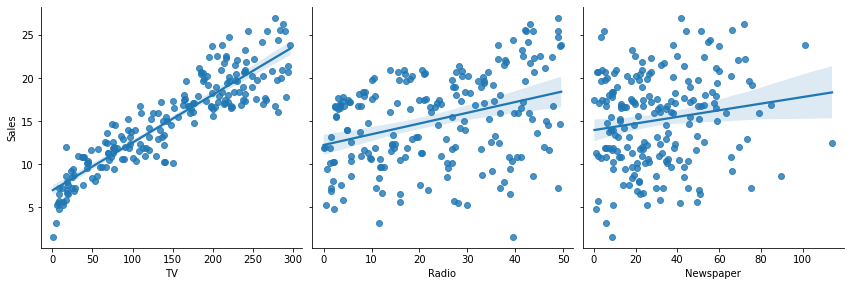

In [ ]:

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='reg')
#sns.pairplot(advertising, size=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
?sns.pairplot

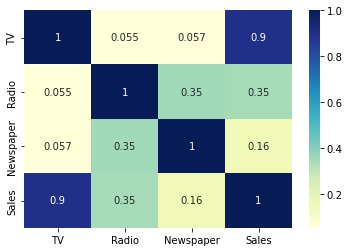

In [ ]:

# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [ ]:
# Splitting the varaibles as training and testing
# 140 samples for constructing beta_0 and beta_1
# 60 samples as an additional evaluation performance measure (with R^2 and R^2_adj)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=1)

In [ ]:
#?train_test_split

In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
X_train_sm

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

# Printing the parameters
lr.params

# y = beta_0*1 + beta_1*x

const    6.904032
TV       0.055661
dtype: float64

In [ ]:
beta_0 = lr.params[0]
beta_1 = lr.params[1]

y_pred = beta_0*1 + beta_1*X_train

df = pd.DataFrame()

df['X'] = X_train
df['Y'] = y_train
df['beta_0'] = beta_0
df['beta_1'] = beta_1
df['beta_1*X'] = beta_1*X_train
df['Y_hat'] = y_pred
df['Res'] = y_train-y_pred
df['Res_squared'] = (y_train-y_pred)**2 
n_train = len(X_train)
df['MSE'] = np.sum((y_train-y_pred)**2)/(n_train-2)
df

,X,Y,beta_0,beta_1,beta_1*X,Y_hat,Res,Res_squared,MSE
116,139.2,12.2,6.904032,0.055661,7.747978,14.652011,-2.452011,6.012357,5.328579
67,139.3,13.4,6.904032,0.055661,7.753544,14.657577,-1.257577,1.581500,5.328579
78,5.4,5.3,6.904032,0.055661,0.300568,7.204601,-1.904601,3.627503,5.328579
42,293.6,20.7,6.904032,0.055661,16.342000,23.246033,-2.546033,6.482282,5.328579
17,281.4,24.4,6.904032,0.055661,15.662939,22.566971,1.833029,3.359994,5.328579
...,...,...,...,...,...,...,...,...,...
133,219.8,19.6,6.904032,0.055661,12.234236,19.138268,0.461732,0.213196,5.328579
137,273.7,20.8,6.904032,0.055661,15.234351,22.138383,-1.338383,1.791270,5.328579
72,26.8,8.8,6.904032,0.055661,1.491708,8.395741,0.404259,0.163425,5.328579
140,73.4,10.9,6.904032,0.055661,4.085500,10.989533,-0.089533,0.008016,5.328579


In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     610.3
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.64e-52
Time:                        16:22:26   Log-Likelihood:                -314.76
No. Observations:                 140   AIC:                             633.5
Df Residuals:                     138   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9040      0.376     18.356      0.000       6.160       7.648
TV             0.0557      0.002     24.704      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.165
Skew:                          -0.062   Prob(JB):                        0.921
Kurtosis:                       3.114   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#?sm.OLS

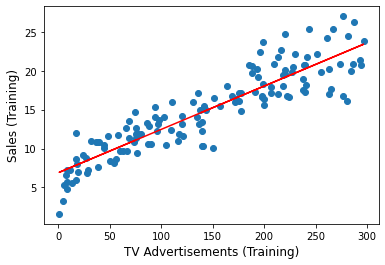

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1]*X_train, 'r')
plt.ylabel('Sales (Training)', fontsize=12)
plt.xlabel('TV Advertisements (Training)', fontsize=12)
plt.show()

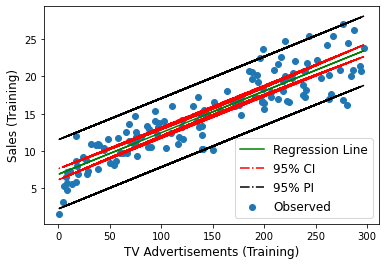

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Visualizing the confidence interval
from scipy import stats
n = len(res)
SSE = np.sum(res**2)
MSE = SSE/(n-2)
y_pred = lr.params[0] + lr.params[1]*X_train

# Misc values
t_fac = stats.t.ppf(1-0.025, 138)
x_bar = np.mean(X_train)
s_xx = np.sum((X_train-x_bar)**2)

c_low_train = y_train_pred - t_fac*np.sqrt(MSE)*np.sqrt(1/n+(X_train-x_bar)**2/s_xx)
c_up_train = y_train_pred + t_fac*np.sqrt(MSE)*np.sqrt(1/n+(X_train-x_bar)**2/s_xx)

p_low_train = y_train_pred - t_fac*np.sqrt(MSE)*np.sqrt(1+1/n+(X_train-x_bar)**2/s_xx)
p_up_train = y_train_pred + t_fac*np.sqrt(MSE)*np.sqrt(1+1/n+(X_train-x_bar)**2/s_xx)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'g')
plt.plot(X_train, c_low_train, 'r-.')
plt.plot(X_train, p_low_train, 'k-.')
plt.ylabel('Sales (Training)', fontsize=12)
plt.xlabel('TV Advertisements (Training)', fontsize=12)
plt.legend(['Regression Line','95% CI', '95% PI','Observed'],fontsize=12)
plt.plot(X_train, c_up_train, 'r-.')
plt.plot(X_train, p_up_train, 'k-.')
plt.show()

In [ ]:
PI_CI_df = pd.DataFrame()
PI_CI_df['Sales_y'] = y_train
PI_CI_df['TV_x'] = X_train
PI_CI_df['beta_0'] = lr.params[0]
PI_CI_df['beta_1'] = lr.params[1]
PI_CI_df['Sales_pred'] = y_pred
PI_CI_df['t_multiplier'] = stats.t.ppf(1-0.025, 138)
PI_CI_df['MSE'] = MSE
PI_CI_df['S_xx'] = s_xx
PI_CI_df['Lower_CI_tail'] = c_low_train
PI_CI_df['Upper_CI_tail'] = c_up_train
PI_CI_df['Lower_PI_tail'] = p_low_train
PI_CI_df['Upper_PI_tail'] = p_up_train
PI_CI_df

,Sales_y,TV_x,beta_0,beta_1,Sales_pred,t_multiplier,MSE,S_xx,Lower_CI_tail,Upper_CI_tail,Lower_PI_tail,Upper_PI_tail
116,12.2,139.2,6.904032,0.055661,14.652011,1.977304,5.328579,1.049670e+06,14.265934,15.038087,10.071361,19.232661
67,13.4,139.3,6.904032,0.055661,14.657577,1.977304,5.328579,1.049670e+06,14.271518,15.043635,10.076928,19.238226
78,5.3,5.4,6.904032,0.055661,7.204601,1.977304,5.328579,1.049670e+06,6.481371,7.927830,2.583306,11.825895
42,20.7,293.6,6.904032,0.055661,23.246033,1.977304,5.328579,1.049670e+06,22.471022,24.021043,18.616352,27.875713
17,24.4,281.4,6.904032,0.055661,22.566971,1.977304,5.328579,1.049670e+06,21.838599,23.295344,17.944869,27.189073
...,...,...,...,...,...,...,...,...,...,...,...,...
133,19.6,219.8,6.904032,0.055661,19.138268,1.977304,5.328579,1.049670e+06,18.621805,19.654731,14.544791,23.731746
137,20.8,273.7,6.904032,0.055661,22.138383,1.977304,5.328579,1.049670e+06,21.438873,22.837894,17.520742,26.756025
72,8.8,26.8,6.904032,0.055661,8.395741,1.977304,5.328579,1.049670e+06,7.751146,9.040335,3.786099,13.005383
140,10.9,73.4,6.904032,0.055661,10.989533,1.977304,5.328579,1.049670e+06,10.495389,11.483676,6.398511,15.580554


In [ ]:
stats.t.ppf(1-0.025, 138)*np.sqrt(MSE)*np.sqrt(1/n+(X_train[116]-x_bar)**2/s_xx)

0.3860764313170518

In [ ]:
#t_factor = 1.997
t_factor = stats.t.ppf(1-0.025, 138)
#sigma_e_2 = 5.329
print(200*0.7-2)
sigma_e_2 = np.sum(res**2)/138
x_bar = np.mean(X_train)

#y_hat + t_mul*sqrt(sigma_e_2*(1/n + num/den))
#x_h = X_train[37]
x_h = 74.7
num = (x_h-x_bar)**2
den = np.sum((X_train-x_bar)**2)

CI_lower = beta_0*1 + beta_1*x_h - t_factor*np.sqrt(sigma_e_2*(1/n+num/den))
CI_upper = beta_0*1 + beta_1*x_h + t_factor*np.sqrt(sigma_e_2*(1/n+num/den))

PI_lower = beta_0*1 + beta_1*x_h - t_factor*np.sqrt(sigma_e_2*(1+1/n+num/den))
PI_upper = beta_0*1 + beta_1*x_h + t_factor*np.sqrt(sigma_e_2*(1+1/n+num/den))

print(CI_lower)
print(CI_upper)

print(PI_lower)
print(PI_upper)


138.0
10.57134679135253
11.552436239747978
6.471255933323007
15.6525270977775


In [ ]:
19.043-0.487

18.556

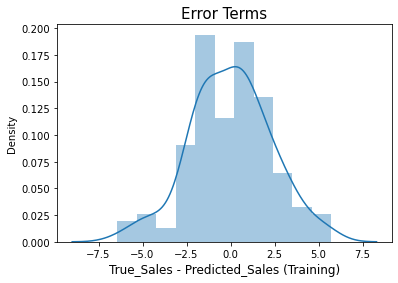

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = int(np.sqrt(n_train)), kde=True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('True_Sales - Predicted_Sales (Training)', fontsize = 12)
plt.show()

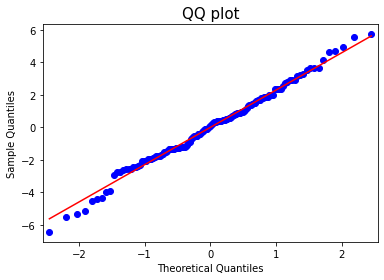

In [ ]:
# QQ-plot: Looking to see if the residuals follows a normal distribution using standardized normal dist quantiles
sm.qqplot(res, line ='s')
plt.title('QQ plot', fontsize=15)
plt.show()

In [ ]:
#?sm.qqplot

In [ ]:
#?sns.distplot

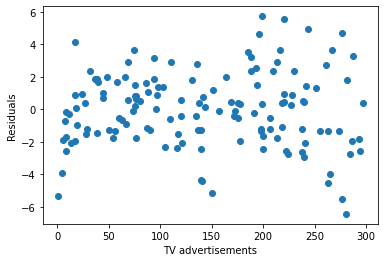

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.ylabel('Residuals')
plt.xlabel('TV advertisements')
plt.show()

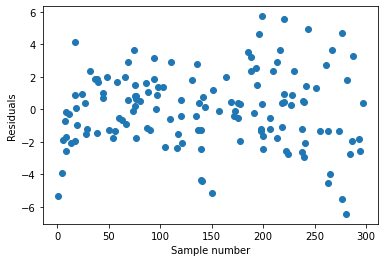

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.ylabel('Residuals')
plt.xlabel('Sample number')
plt.show()

In [ ]:
#?plt.scatter

In [ ]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

58     18.637321
40     18.175337
34     12.230768
102    22.500178
184    21.030734
198    22.689425
95     15.993435
4      16.967499
29     10.833682
168    18.893361
171    16.060228
18     10.755757
11     18.854398
89     13.015584
110    19.472233
118    13.900590
159    14.234555
35     23.084616
136     8.328948
59     18.631755
51     12.492373
16     10.677832
44      8.301118
94     12.881998
31     13.188133
162    17.390520
38      9.303011
28     20.752430
193    16.188248
27     20.268182
47     20.257050
165    19.956482
194    15.236449
177    16.377494
176    20.730166
97     17.195708
174    19.282986
73     14.106535
69     18.971286
172     7.994983
108     7.633188
107    11.935766
189     7.944889
14     18.264394
56      7.310356
19     15.102863
114    11.256704
39     19.594687
185    18.314489
124    19.678178
98     23.028956
123    13.755872
119     7.983851
53     17.067688
33     21.687531
179    16.121455
181    19.065909
106     8.295552
199    19.8228

In [ ]:
?lr.predict

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

res_test = y_test-y_test_pred
SST = np.sum((y_test - np.mean(y_test))**2)
SSE = np.sum(res_test**2)
r_squared_manual = 1-SSE/SST
print(r_squared_manual)
n_test = len(y_test)
MSE = SSE/(n_test-2)
MST = SST/(n_test-1)
r_squared_adjusted = 1-MSE/MST
print(r_squared_adjusted)
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7984701565892567
0.7949955041166576


0.7984701565892567

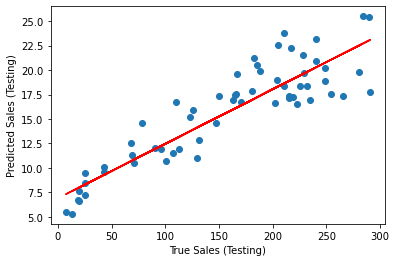

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('True Sales (Testing)')
plt.ylabel('Predicted Sales (Testing)')
plt.show()